In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplot
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [8]:
#Multinomial
df = pd.read_csv('yourinitial_nb_train.csv')

In [9]:
df.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=0
0,16217,0,0,0,0,0,0,1,3,3,...,0,1,1,1,1,1,25,3,2,0
1,490,0,0,1,0,1,0,1,4,3,...,1,0,1,1,0,0,37,3,2,1
2,22121,0,0,0,0,0,0,0,2,3,...,0,1,0,1,0,1,25,3,2,0
3,38243,0,0,0,0,1,1,0,4,3,...,0,0,1,0,1,0,28,3,3,1
4,11544,0,0,0,1,0,1,0,3,3,...,0,0,0,0,0,0,31,3,4,0


In [10]:
df.columns.values

array(['ID_CLIENT', 'CLERK_TYPE', 'PAYMENT_DAY',
       'APPLICATION_SUBMISSION_TYPE', 'QUANT_ADDITIONAL_CARDS',
       'POSTAL_ADDRESS_TYPE', 'SEX', 'MARITAL_STATUS', 'QUANT_DEPENDANTS',
       'EDUCATION_LEVEL', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH',
       'NACIONALITY', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY',
       'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE',
       'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCE_TYPE',
       'MONTHS_IN_RESIDENCE', 'FLAG_MOBILE_PHONE', 'FLAG_EMAIL',
       'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA',
       'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS',
       'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE',
       'QUANT_CARS', 'COMPANY', 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY',
       'PROFESSIONAL_BOROUGH', 'FLAG_PROFESSIONAL_PHONE',
       'PROFESSIONAL_PHONE_AREA_CODE', 'MONTHS_IN_THE_JOB',
       'PROFESSION_CODE', 'OCCUPATION_TYPE', 'MATE_PROFESSION_CODE',


In [11]:
#remove all non categorical columns
df = df.drop(['ID_CLIENT','RESIDENCIAL_STATE', 'RESIDENCIAL_CITY','RESIDENCIAL_BOROUGH',
              'PERSONAL_MONTHLY_INCOME','OTHER_INCOMES','AGE'],axis=1)

In [14]:
X = df.drop(['TARGET_LABEL_BAD=0'],axis=1)
y = df['TARGET_LABEL_BAD=0']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=69)

In [18]:
nb = MultinomialNB()

model = nb.fit(X_train,y_train)

In [19]:
predicted = model.predict(X_test)

In [21]:
print(predicted[0:25])

[1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1]


In [22]:
print('Accuracy: ',np.mean(predicted==y_test))

Accuracy:  0.8656


In [23]:
print(confusion_matrix(y_test,predicted))

[[1788  466]
 [ 542 4704]]


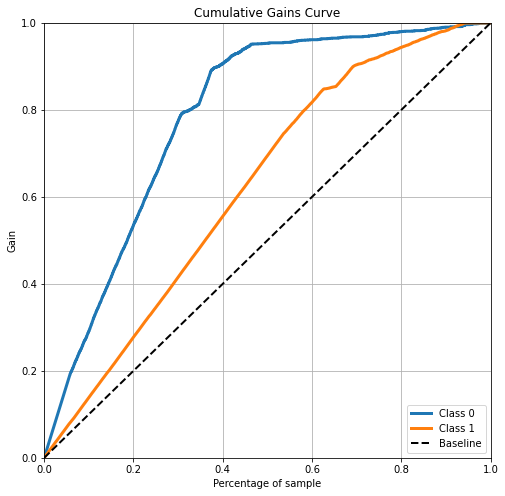

In [27]:
#cumulative gain
predicted_probas = model.predict_proba(X_test)
skplot.metrics.plot_cumulative_gain(y_true = y_test,y_probas=predicted_probas,figsize=(8,8))
plt.show()

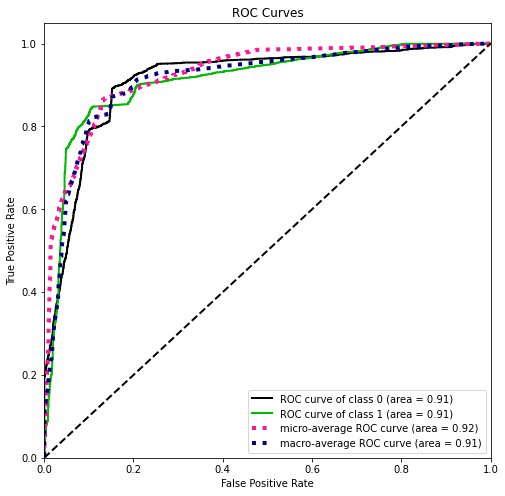

In [31]:
skplot.metrics.plot_roc(y_test,predicted_probas,figsize=(8,8))
plt.show()

In [34]:
#Gaussian Model
df2 = pd.read_csv('yourinitial_nb_train.csv')

In [35]:
#remove all non categorical + continuous columns
df2 = df2.drop(['ID_CLIENT','RESIDENCIAL_STATE', 'RESIDENCIAL_CITY','RESIDENCIAL_BOROUGH'],axis=1)

In [36]:
X = df2.drop(['TARGET_LABEL_BAD=0'],axis=1)
y = df2['TARGET_LABEL_BAD=0']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=69)

In [38]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [39]:
model = nb.fit(X_train,y_train)

In [40]:
predicted = model.predict(X_test)

In [42]:
print('Accuracy: ',np.mean(predicted == y_test))

Accuracy:  0.8426666666666667


In [43]:
print(confusion_matrix(y_test,predicted))

[[1842  412]
 [ 768 4478]]


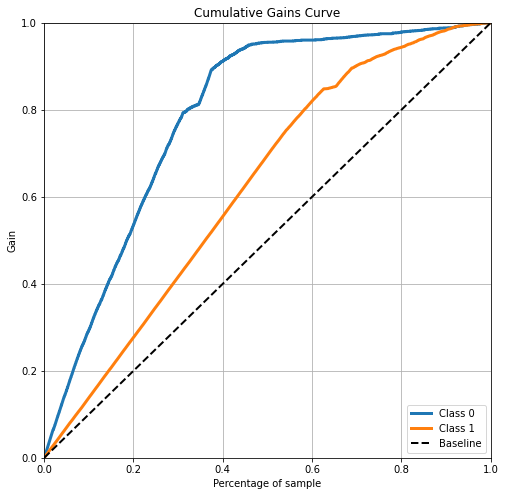

In [44]:
predicted_probas = model.predict_proba(X_test)
skplot.metrics.plot_cumulative_gain(y_true = y_test,y_probas=predicted_probas,figsize=(8,8))
plt.show()

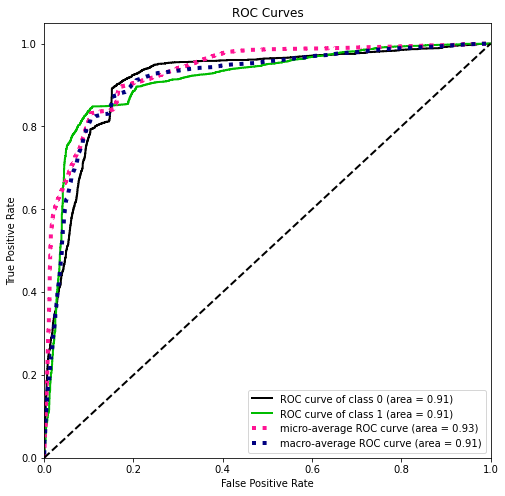

In [45]:
skplot.metrics.plot_roc(y_test,predicted_probas,figsize=(8,8))
plt.show()